In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
data_frame = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data_frame['GRE Score'] = data_frame['GRE Score'] / data_frame['GRE Score'].max()
data_frame['TOEFL Score'] = data_frame['TOEFL Score'] / data_frame['TOEFL Score'].max()
data_frame['SOP'] = data_frame['SOP'] / data_frame['SOP'].max()
data_frame['LOR '] = data_frame['LOR '] / data_frame['LOR '].max()
data_frame['CGPA'] = data_frame['CGPA'] / data_frame['CGPA'].max()

In [4]:
mediaChance = data_frame['Chance of Admit '].mean()

data_frame[(data_frame[['Chance of Admit ']] >= mediaChance)] = 1
data_frame[(data_frame[['Chance of Admit ']] < mediaChance)] = 0

data_frame.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.991176,0.983333,4,0.9,0.9,0.972782,1,1.0
1,2,0.952941,0.891667,4,0.8,0.9,0.894153,1,1.0
2,3,0.929412,0.866667,3,0.6,0.7,0.806452,1,0.0
3,4,0.947059,0.916667,3,0.7,0.5,0.873992,1,1.0
4,5,0.923529,0.858333,2,0.4,0.6,0.827621,0,0.0


In [5]:
x = data_frame.drop(['Serial No.', 'Research', 'Chance of Admit ', 'University Rating'], axis=1)[['GRE Score', 'TOEFL Score', 'CGPA','SOP', 'LOR ']]
y = data_frame['Chance of Admit ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(5,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               768       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,154
Trainable params: 9,154
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("[INFO] treinando a rede neural...")
model.compile(optimizer=SGD(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
train = model.fit(x=x_train, y=y_train, batch_size=128, epochs=10, verbose=2, validation_data=(x_test, y_test))

[INFO] treinando a rede neural...
Train on 350 samples, validate on 150 samples
Epoch 1/10
 - 0s - loss: 0.6983 - acc: 0.4829 - val_loss: 0.6899 - val_acc: 0.5533
Epoch 2/10
 - 0s - loss: 0.6959 - acc: 0.4829 - val_loss: 0.6911 - val_acc: 0.5533
Epoch 3/10
 - 0s - loss: 0.6947 - acc: 0.4829 - val_loss: 0.6929 - val_acc: 0.5533
Epoch 4/10
 - 0s - loss: 0.6943 - acc: 0.4543 - val_loss: 0.6935 - val_acc: 0.4000
Epoch 5/10
 - 0s - loss: 0.6939 - acc: 0.4229 - val_loss: 0.6942 - val_acc: 0.4467
Epoch 6/10
 - 0s - loss: 0.6935 - acc: 0.5086 - val_loss: 0.6956 - val_acc: 0.4467
Epoch 7/10
 - 0s - loss: 0.6936 - acc: 0.5171 - val_loss: 0.6956 - val_acc: 0.4467
Epoch 8/10
 - 0s - loss: 0.6932 - acc: 0.5171 - val_loss: 0.6959 - val_acc: 0.4467
Epoch 9/10
 - 0s - loss: 0.6932 - acc: 0.5171 - val_loss: 0.6963 - val_acc: 0.4467
Epoch 10/10
 - 0s - loss: 0.6934 - acc: 0.5171 - val_loss: 0.6970 - val_acc: 0.4467


In [10]:
print("[INFO] avaliando a rede neural...")
predictions = model.predict(x_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

[INFO] avaliando a rede neural...
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.45      1.00      0.62        67

   micro avg       0.45      0.45      0.45       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.20      0.45      0.28       150



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


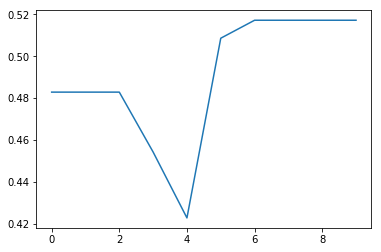

In [12]:
plt.plot(train.history['acc'])
plt.show()

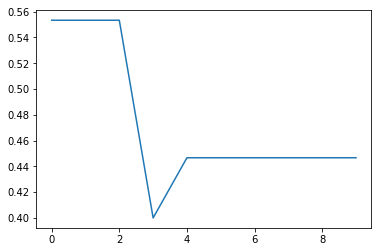

In [13]:
plt.plot(train.history['val_acc'])
plt.show()